In [12]:
import pandas as pd
from collections import defaultdict
import gzip
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
path = "./small_data/ydata-fp-td-clicks-v2_0.20111002.gz"
dic = defaultdict(list)
with gzip.open(path,"rb") as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
        elements = line.decode('utf-8').strip().split(" |")
        ts, displayed_arm, reward = elements[0].split(" ")
        feature_idx = np.array(elements[1].split(" ")[1:]).astype("int")-1
        features = np.zeros(136)
        features[feature_idx] = 1
        pools = elements[2:]
        
        dic['displayed_arm'].append(displayed_arm)
        dic['reward'].append(reward)
        dic['features'].append(features)
        dic['pool'].append(pools)

In [3]:
train = pd.DataFrame(dic)
train.head(5)

,displayed_arm,reward,features,pool
0,id-560620,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[id-552077, id-555224, id-555528, id-559744, i..."
1,id-565648,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[id-552077, id-555224, id-555528, id-559744, i..."
2,id-563115,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[id-552077, id-555224, id-555528, id-559744, i..."
3,id-552077,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[id-552077, id-555224, id-555528, id-559744, i..."
4,id-564335,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[id-552077, id-555224, id-555528, id-559744, i..."


In [4]:
arm = train['displayed_arm'].unique()
random.shuffle(arm)
arm

array(['id-565515', 'id-564371', 'id-562637', 'id-566726', 'id-564604',
       'id-563938', 'id-564418', 'id-562265', 'id-566573', 'id-552077',
       'id-566838', 'id-565364', 'id-565533', 'id-560290', 'id-560805',
       'id-566587', 'id-565980', 'id-566825', 'id-565930', 'id-566541',
       'id-566439', 'id-564335', 'id-566631', 'id-565747', 'id-560518',
       'id-563643', 'id-565648', 'id-566478', 'id-566092', 'id-563582',
       'id-565561', 'id-566022', 'id-562374', 'id-560620', 'id-566689',
       'id-565589', 'id-555528', 'id-563846', 'id-559833', 'id-559855',
       'id-565479', 'id-559744', 'id-565822', 'id-555224', 'id-563115',
       'id-566013', 'id-566602', 'id-566431', 'id-563787'], dtype=object)

In [5]:
reward = np.zeros(len(arm))
play = np.zeros(len(arm))
mu = np.zeros(len(arm))
time = 0

iter_ = max(train.index)
cum_reward = []

In [6]:
while sum(play == 1) != len(arm):
    tmp_idx = np.argmin(play)
    play[tmp_idx] += 1
    if train['displayed_arm'].iloc[time] == arm[tmp_idx]:
        reward[tmp_idx] += int(train['reward'].iloc[time])
    else:
        reward[tmp_idx] += 0
    time += 1
    mu = reward/play
    cum_reward.append(sum(reward))
    
while time < iter_:
    action = np.argmax(mu + (2*np.log(time))/play)
    play[action] += 1
    if train['displayed_arm'].iloc[time] == arm[action]:
        reward[action] += int(train['reward'].iloc[time])
    else:
        reward[action] += 0
    time += 1
    mu = reward/play
    cum_reward.append(sum(reward))

C:\Users\Byeongwoo\AppData\Local\Temp\ipykernel_11356\2797139607.py:9: RuntimeWarning: invalid value encountered in divide
  mu = reward/play


In [7]:
reward_result = reward.astype(int)
arm_reward = dict(zip(arm, reward_result))
arm_reward

{'id-565515': 103,
 'id-564371': 0,
 'id-562637': 0,
 'id-566726': 0,
 'id-564604': 5,
 'id-563938': 2,
 'id-564418': 11,
 'id-562265': 0,
 'id-566573': 0,
 'id-552077': 0,
 'id-566838': 0,
 'id-565364': 20,
 'id-565533': 74,
 'id-560290': 20,
 'id-560805': 8,
 'id-566587': 0,
 'id-565980': 0,
 'id-566825': 0,
 'id-565930': 22,
 'id-566541': 0,
 'id-566439': 0,
 'id-564335': 10,
 'id-566631': 0,
 'id-565747': 260,
 'id-560518': 11,
 'id-563643': 48,
 'id-565648': 14,
 'id-566478': 0,
 'id-566092': 6,
 'id-563582': 25,
 'id-565561': 23,
 'id-566022': 4,
 'id-562374': 0,
 'id-560620': 2,
 'id-566689': 0,
 'id-565589': 25,
 'id-555528': 12,
 'id-563846': 60,
 'id-559833': 0,
 'id-559855': 12,
 'id-565479': 41,
 'id-559744': 2,
 'id-565822': 88,
 'id-555224': 51,
 'id-563115': 59,
 'id-566013': 17,
 'id-566602': 0,
 'id-566431': 2343,
 'id-563787': 1}

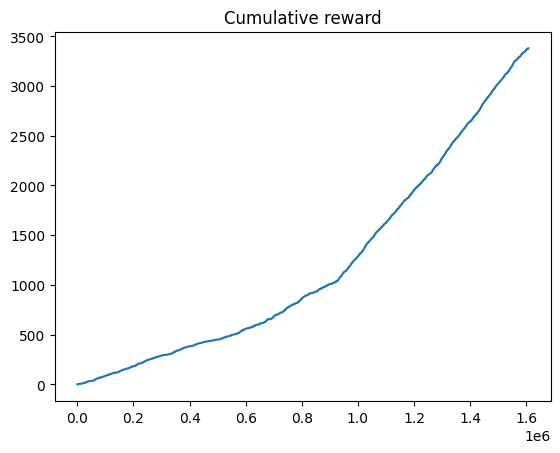

In [14]:
plt.plot(cum_reward)
plt.title("Cumulative reward")
plt.show()